In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
u_ads_train = pd.read_csv('preprocessed_real_data.csv')

Preprocess the preprocessed_real_data so that ctgan can run

In [4]:
# Preprocess dataset so CTGAN and CatBoost can run
# Convert list-like columns into count variables
# For ad_click_list_v001, ad_click_list_v002, ad_click_list_v003, ad_close_list_v001, ad_close_list_v002, ad_close_list_v003
for col in ['ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
            #'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003'
            ]:
    u_ads_train[f'{col}_count'] = u_ads_train[col].apply(lambda x: len(str(x).split('^')) if isinstance(x, str) else 0)

# For u_newsCatInterestsST, convert it to a count of categories
u_ads_train['news_interests_count'] = u_ads_train['u_newsCatInterestsST'].apply(lambda x: len(str(x).split('^')) if isinstance(x, str) else 0)

# Drop the original columns
u_ads_train = u_ads_train.drop(['ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
                        #'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003'
                        'u_newsCatInterestsST'], axis=1)
# Identify categorical columns (i.e., columns that are non-numeric)
categorical_columns = u_ads_train.select_dtypes(include=['object']).columns
# Change "day_name" to numeric
# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply Label Encoding to each categorical column
for col, encoder in label_encoders.items():
    u_ads_train[col] = encoder.fit_transform(u_ads_train[col])

# Output the preprocessed dataset to a new CSV file
u_ads_train.to_csv('preprocessed_twice_real_data.csv', index=False)

Load datasets

In [8]:
u_ads_train = pd.read_csv('preprocessed_twice_real_data.csv')
combined_data = pd.read_csv('combined_data_.csv')
synthetic_data_full = pd.read_csv('synthetic_df_full.csv')
synthetic_data_full_equal = pd.read_csv('synthetic_df_full_equal.csv')

## Logistic Regression

Logistic Regression on Combined Data

edited so that training is 80% of data and testing is 20%

In [6]:
# Data Prep

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Data Prep

# Separate features (X) from labels (y)
X = combined_data.drop(['label'], axis=1)
y = combined_data['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()


In [7]:
# Logistic Regression

# Initialize the Logistic Regression model with class weights to handle imbalance
model = LogisticRegression(max_iter=10000)

# Train the model on the cleaned training data
model.fit(X_train, y_train)

# Make predictions on the cleaned validation set
y_pred = model.predict(X_val_clean)
y_prob = model.predict_proba(X_val_clean)[:, 1]

# Adjust the threshold for class 1 predictions
y_pred_adjusted = (y_prob > 0.3).astype(int)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_val_clean, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_clean, y_pred))
print("Classification Report:")
print(classification_report(y_val_clean, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.6325
Confusion Matrix:
[[255 145]
 [149 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       400
           1       0.63      0.63      0.63       400

    accuracy                           0.63       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.63      0.63      0.63       800

AUC-ROC: 0.6324999999999998


Logistic Reg on Original

In [9]:
# Data Prep

# Separate features (X) from labels (y)
X = u_ads_train.drop(['label'], axis=1)
y = u_ads_train['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

In [10]:
# Initialize the Logistic Regression model with class weights to handle imbalance
model = LogisticRegression(max_iter=10000)

# Train the model on the cleaned training data
model.fit(X_train, y_train)

# Make predictions on the cleaned validation set
y_pred = model.predict(X_val_clean)
y_prob = model.predict_proba(X_val_clean)[:, 1]

# Adjust the threshold for class 1 predictions
y_pred_adjusted = (y_prob > 0.3).astype(int)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_val_clean, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_clean, y_pred))
print("Classification Report:")
print(classification_report(y_val_clean, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.6838810641627543
Confusion Matrix:
[[335  65]
 [137 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       400
           1       0.61      0.43      0.50       239

    accuracy                           0.68       639
   macro avg       0.66      0.63      0.64       639
weighted avg       0.67      0.68      0.67       639

AUC-ROC: 0.6321391213389121


Logistic Reg on all synthetic, not equal:

In [11]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full.drop(['label'], axis=1)
y = synthetic_data_full['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# Initialize the Logistic Regression model with class weights to handle imbalance
model = LogisticRegression(max_iter=1000000)

# Train the model on the cleaned training data
model.fit(X_train, y_train)

# Make predictions on the cleaned validation set
y_pred = model.predict(X_val_clean)
y_prob = model.predict_proba(X_val_clean)[:, 1]

# Adjust the threshold for class 1 predictions
y_pred_adjusted = (y_prob > 0.3).astype(int)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_val_clean, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_clean, y_pred))
print("Classification Report:")
print(classification_report(y_val_clean, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.5633802816901409
Confusion Matrix:
[[336  29]
 [250  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.92      0.71       365
           1       0.45      0.09      0.15       274

    accuracy                           0.56       639
   macro avg       0.51      0.50      0.43       639
weighted avg       0.52      0.56      0.47       639

AUC-ROC: 0.5040695930406959


Logistic Regression, Synthetic - equal dist as original:

In [12]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full_equal.drop(['label'], axis=1)
y = synthetic_data_full_equal['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# Initialize the Logistic Regression model with class weights to handle imbalance
model = LogisticRegression(max_iter=1000000)

# Train the model on the cleaned training data
model.fit(X_train, y_train)

# Make predictions on the cleaned validation set
y_pred = model.predict(X_val_clean)
y_prob = model.predict_proba(X_val_clean)[:, 1]

# Adjust the threshold for class 1 predictions
y_pred_adjusted = (y_prob > 0.3).astype(int)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_val_clean, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_clean, y_pred))
print("Classification Report:")
print(classification_report(y_val_clean, y_pred))

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.8325508607198748
Confusion Matrix:
[[359  41]
 [ 66 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       400
           1       0.81      0.72      0.76       239

    accuracy                           0.83       639
   macro avg       0.83      0.81      0.82       639
weighted avg       0.83      0.83      0.83       639

AUC-ROC: 0.8106746861924685


## Random Forest

Random Forest on Combined Data

In [13]:
# Data Prep

# Separate features (X) from labels (y)
X = combined_data.drop(['label'], axis=1)
y = combined_data['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Use fewer trees, limit depth, and allow multi-core processing
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Print accuracy score
print("Accuracy:", accuracy_score(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Get precision, recall, and F1-score
report = classification_report(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.76875
Confusion Matrix:
[[334  66]
 [119 281]]
Accuracy: 0.76875
Confusion Matrix:
[[334  66]
 [119 281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       400
           1       0.81      0.70      0.75       400

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800

AUC-ROC: 0.76875


Random Forest on Original

In [15]:
# Data Prep

# Separate features (X) from labels (y)
X = u_ads_train.drop(['label'], axis=1)
y = u_ads_train['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# Random Forest

# Use fewer trees, limit depth, and allow multi-core processing
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Print accuracy score
print("Accuracy:", accuracy_score(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Get precision, recall, and F1-score
report = classification_report(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.6964006259780907
Confusion Matrix:
[[343  57]
 [137 102]]
Accuracy: 0.6964006259780907
Confusion Matrix:
[[343  57]
 [137 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       400
           1       0.64      0.43      0.51       239

    accuracy                           0.70       639
   macro avg       0.68      0.64      0.65       639
weighted avg       0.69      0.70      0.68       639

AUC-ROC: 0.6421391213389122


Random Forest on Synthetic - unequal dist to original

In [16]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full.drop(['label'], axis=1)
y = synthetic_data_full['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# Random Forest

# Use fewer trees, limit depth, and allow multi-core processing
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Print accuracy score
print("Accuracy:", accuracy_score(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Get precision, recall, and F1-score
report = classification_report(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.5774647887323944
Confusion Matrix:
[[315  50]
 [220  54]]
Accuracy: 0.5774647887323944
Confusion Matrix:
[[315  50]
 [220  54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70       365
           1       0.52      0.20      0.29       274

    accuracy                           0.58       639
   macro avg       0.55      0.53      0.49       639
weighted avg       0.56      0.58      0.52       639

AUC-ROC: 0.5300469953004701


Random Forest on Synthetic - equal dist to original

In [17]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full_equal.drop(['label'], axis=1)
y = synthetic_data_full_equal['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# Random Forest

# Use fewer trees, limit depth, and allow multi-core processing
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Print accuracy score
print("Accuracy:", accuracy_score(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Get precision, recall, and F1-score
report = classification_report(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.9280125195618153
Confusion Matrix:
[[382  18]
 [ 28 211]]
Accuracy: 0.9280125195618153
Confusion Matrix:
[[382  18]
 [ 28 211]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       400
           1       0.92      0.88      0.90       239

    accuracy                           0.93       639
   macro avg       0.93      0.92      0.92       639
weighted avg       0.93      0.93      0.93       639

AUC-ROC: 0.9189225941422594


## XGBoost on Combined data

In [18]:
# Data Prep

# Separate features (X) from labels (y)
X = combined_data.drop(['label'], axis=1)
y = combined_data['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# xgboost:

# Ensure target variable y is numeric (XGBoost needs numeric targets)
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and validation sets

# Train the XGBoost model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    eval_metric='logloss',        # Log loss as evaluation metric
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report with precision, recall, and f1-score
report = classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.7275
ROC AUC: 0.7275
              precision    recall  f1-score   support

     Class 0       0.72      0.75      0.73       400
     Class 1       0.74      0.71      0.72       400

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

AUC-ROC: 0.7275


XGBoost on Original

In [19]:
# Data Prep

# Separate features (X) from labels (y)
X = u_ads_train.drop(['label'], axis=1)
y = u_ads_train['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# xgboost:

# Ensure target variable y is numeric (XGBoost needs numeric targets)
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and validation sets

# Train the XGBoost model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    eval_metric='logloss',        # Log loss as evaluation metric
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report with precision, recall, and f1-score
report = classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.6714
ROC AUC: 0.6348
              precision    recall  f1-score   support

     Class 0       0.72      0.78      0.75       400
     Class 1       0.57      0.49      0.53       239

    accuracy                           0.67       639
   macro avg       0.64      0.63      0.64       639
weighted avg       0.66      0.67      0.67       639

AUC-ROC: 0.6347698744769875


XGBoost on Synthetic - unequal dist to original

In [20]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full.drop(['label'], axis=1)
y = synthetic_data_full['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# xgboost:

# Ensure target variable y is numeric (XGBoost needs numeric targets)
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and validation sets

# Train the XGBoost model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    eval_metric='logloss',        # Log loss as evaluation metric
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report with precision, recall, and f1-score
report = classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.5696
ROC AUC: 0.5441
              precision    recall  f1-score   support

     Class 0       0.60      0.72      0.66       365
     Class 1       0.50      0.36      0.42       274

    accuracy                           0.57       639
   macro avg       0.55      0.54      0.54       639
weighted avg       0.56      0.57      0.56       639

AUC-ROC: 0.5441255874412558


XGBoost on Synthetic - equal dist to original

In [21]:
# Data Prep

# Separate features (X) from labels (y)
X = synthetic_data_full_equal.drop(['label'], axis=1)
y = synthetic_data_full_equal['label']

# Remove rows with missing target values (y_combined)
X_clean = X[~y.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_clean = X.dropna()

# Remove the corresponding rows in y_combined
y_clean = y[X.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val_clean = X_val[~y_val.isnull()]
y_val_clean = y_val.dropna()

# xgboost:

# Ensure target variable y is numeric (XGBoost needs numeric targets)
y = pd.to_numeric(y, errors='coerce')

# Split the data into training and validation sets

# Train the XGBoost model
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Initialize the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification problem
    eval_metric='logloss',        # Log loss as evaluation metric
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report with precision, recall, and f1-score
report = classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

# Calculate AUC-ROC
auc = roc_auc_score(y_val, y_pred)
print(f"AUC-ROC: {auc}")

Accuracy: 0.9374
ROC AUC: 0.9306
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95       400
     Class 1       0.93      0.90      0.92       239

    accuracy                           0.94       639
   macro avg       0.94      0.93      0.93       639
weighted avg       0.94      0.94      0.94       639

AUC-ROC: 0.9306328451882846


Catboost on combined data (code continues on Google Colab because CatBoost didn't run on my computer VSCode)

In [ ]:
# Prepare the final training dataset (features and labels)

print("Class distribution in y_combined:")
print(y_combined.value_counts())

print("Class distribution in X_combined:")
print(X_combined.value_counts())

# Remove rows with missing target values (y_combined)
X_combined_clean = X_combined[~y_combined.isnull()]

# Remove rows with missing values in X_combined (now aligned with y_combined)
X_combined_clean = X_combined_clean.dropna()

# Remove the corresponding rows in y_combined
y_combined_clean = y_combined[X_combined_clean.index]

# Split your cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_combined_clean, y_combined_clean, random_state=42, stratify=y_combined_clean)

# Remove rows with missing target values from the validation set (y_val)
X_val = X_val[~y_val.isnull()]
y_val = y_val.dropna()

## Data Visualization
Compare the classification table results for original, combined, synthetic equal, synthetic unequal

F1 score for 1

In [23]:
import matplotlib.pyplot as plt

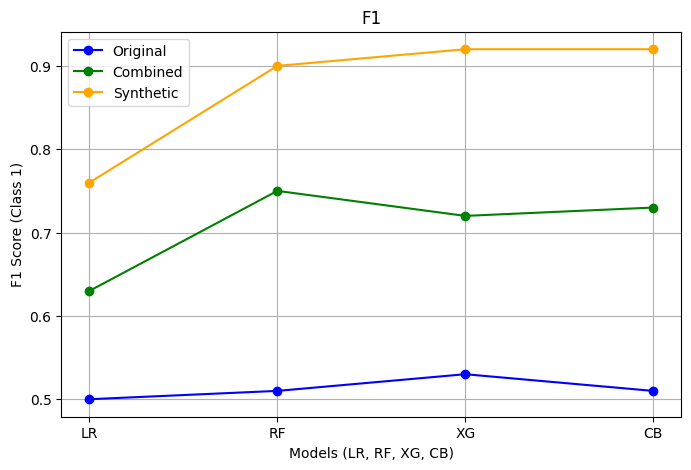

In [25]:
# Data
categories = ['LR', 'RF', 'XG', 'CB']
original_f1_class_1_scores = [0.50, 0.51, 0.53, 0.51]  # F1 score for class 1 for "Original"
combined_f1_class_1_scores = [0.63, 0.75, 0.72, 0.73]  # F1 score for class 1 for "Combined"
synthetic_f1_class_1_scores = [0.76, 0.90, 0.92, 0.92]  # F1 score for class 1 for "Synthetic - equal dist"

# Plot
plt.figure(figsize=(8, 5))

# Plot for "original"
plt.plot(categories, original_f1_class_1_scores, label='Original', color='blue', marker='o')

# Plot for "Combined"
plt.plot(categories, combined_f1_class_1_scores, label='Combined', color='green', marker='o')

# Plot for "Synthetic Equal"
plt.plot(categories, synthetic_f1_class_1_scores, label='Synthetic', color='orange', marker='o')

# Adding title and labels
plt.title('F1')
plt.xlabel('Models (LR, RF, XG, CB)')
plt.ylabel('F1 Score (Class 1)')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()


Compare the Accuracy

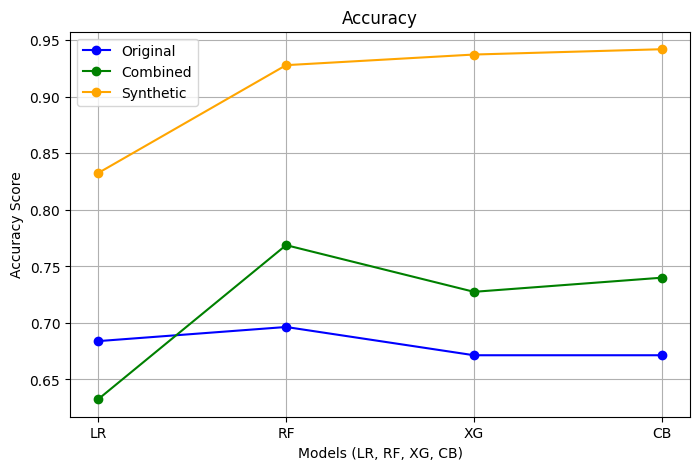

In [26]:
# Data
categories = ['LR', 'RF', 'XG', 'CB']
original_accuracy_scores = [0.6839, 0.6964, 0.6714, 0.6714]  # Accuracy scores for "original"
combined_accuracy_scores = [0.6325, 0.7688, 0.7275, 0.7400]  # Accuracy scores for "Combined"
synthetic_accuracy_scores = [0.8326, 0.9280, 0.9374, 0.9421]  # Accuracy scores for "Synthetic Equal"

# Plot
plt.figure(figsize=(8, 5), facecolor='white')

# Plot for "original"
plt.plot(categories, original_accuracy_scores, label='Original', color='blue', marker='o')

# Plot for "Combined"
plt.plot(categories, combined_accuracy_scores, label='Combined', color='green', marker='o')

# Plot for "Synthetic Equal"
plt.plot(categories, synthetic_accuracy_scores, label='Synthetic', color='orange', marker='o')

# Adding title and labels
plt.title('Accuracy')
plt.xlabel('Models (LR, RF, XG, CB)')
plt.ylabel('Accuracy Score')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()


Compare Precision for 1

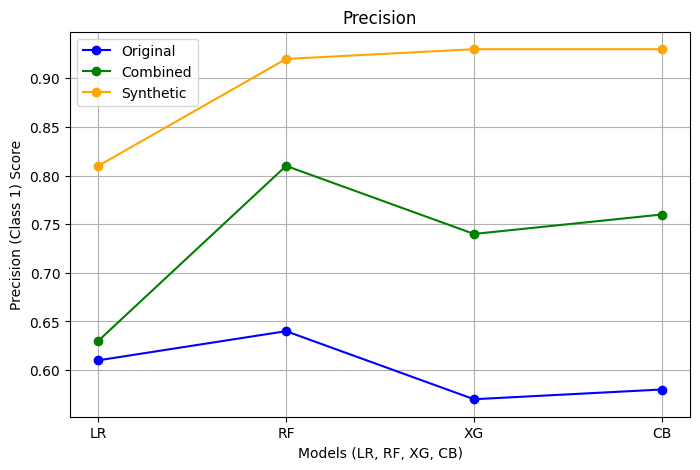

In [27]:
# Data
categories = ['LR', 'RF', 'XG', 'CB']
original_precision_class_1_scores = [0.61, 0.64, 0.57, 0.58]  # Precision for class 1 (positive class) for "original"
combined_precision_class_1_scores = [0.63, 0.81, 0.74, 0.76]  # Precision for class 1 for "Combined"
synthetic_equal_precision_class_1_scores = [0.81, 0.92, 0.93, 0.93]  # Precision for class 1 for "Synthetic Equal"

# Plot
plt.figure(figsize=(8, 5))

# Plot for "original"
plt.plot(categories, original_precision_class_1_scores, label='Original', color='blue', marker='o')

# Plot for "Combined"
plt.plot(categories, combined_precision_class_1_scores, label='Combined', color='green', marker='o')

# Plot for "Synthetic Equal"
plt.plot(categories, synthetic_equal_precision_class_1_scores, label='Synthetic', color='orange', marker='o')

# Adding title and labels
plt.title('Precision')
plt.xlabel('Models (LR, RF, XG, CB)')
plt.ylabel('Precision (Class 1) Score')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()


Recall for 1

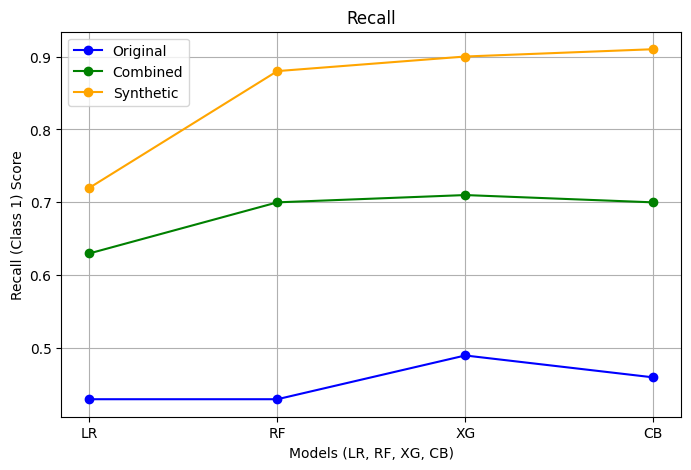

In [28]:
# Data
categories = ['LR', 'RF', 'XG', 'CB']
original_recall_class_1_scores = [0.43, 0.43, 0.49, 0.46]  # Recall for class 1 (positive class) for "original"
combined_recall_class_1_scores = [0.63, 0.70, 0.71, 0.70]  # Recall for class 1 for "Combined"
synthetic_equal_recall_class_1_scores = [0.72, 0.88, 0.90, 0.91]  # Recall for class 1 for "Synthetic Equal"

# Plot
plt.figure(figsize=(8, 5))

# Plot for "original"
plt.plot(categories, original_recall_class_1_scores, label='Original', color='blue', marker='o')

# Plot for "Combined"
plt.plot(categories, combined_recall_class_1_scores, label='Combined', color='green', marker='o')

# Plot for "Synthetic Equal"
plt.plot(categories, synthetic_equal_recall_class_1_scores, label='Synthetic', color='orange', marker='o')

# Adding title and labels
plt.title('Recall')
plt.xlabel('Models (LR, RF, XG, CB)')
plt.ylabel('Recall (Class 1) Score')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()


AUC ROC Comparison

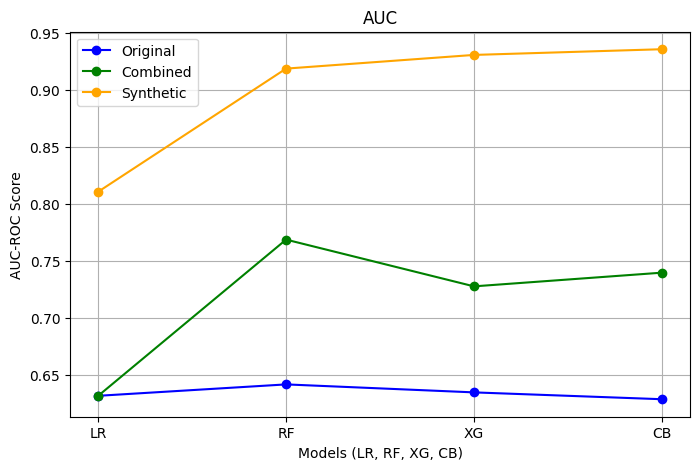

In [29]:
# Data
categories = ['LR', 'RF', 'XG', 'CB']
original_auc_roc_scores = [0.632, 0.642, 0.635, 0.629]  # AUC-ROC scores for "original"
combined_auc_roc_scores = [0.632, 0.769, 0.728, 0.740]  # AUC-ROC scores for "Combined"
synthetic_equal_auc_roc_scores = [0.811, 0.919, 0.931, 0.936]  # AUC-ROC scores for "Synthetic Equal"

# Plot
plt.figure(figsize=(8, 5))

# Plot for "original"
plt.plot(categories, original_auc_roc_scores, label='Original', color='blue', marker='o')

# Plot for "Combined"
plt.plot(categories, combined_auc_roc_scores, label='Combined', color='green', marker='o')

# Plot for "Synthetic Equal"
plt.plot(categories, synthetic_equal_auc_roc_scores, label='Synthetic', color='orange', marker='o')

# Adding title and labels
plt.title('AUC')
plt.xlabel('Models (LR, RF, XG, CB)')
plt.ylabel('AUC-ROC Score')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display plot
plt.show()


For synthetic data evaluation (check the quality of synthetic data)

This was run on Google Colab:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

###############################################################################
# 1) Data Loading & Type Casting
###############################################################################
def load_and_cast(
    real_csv_path: str,
    synth_csv_path: str,
    num_col_idx: list = None,
    cat_col_idx: list = None,
    target_col_idx: list = None
):
    """
    Load real and synthetic CSVs into pandas DataFrames, then cast columns
    based on the numeric, categorical, and target column indices.
    """
    import pandas as pd

    # 1) Load the real & synthetic data
    real_df = pd.read_csv(real_csv_path)
    # Maybe sample if needed
    real_df = real_df.sample(frac=0.05, random_state=42)

    synth_df = pd.read_csv(synth_csv_path)

    # 2) Convert indices -> column names
    real_cols = real_df.columns.tolist()
    synth_cols = synth_df.columns.tolist()

    # Some columns might differ, but let's assume they match
    # If they differ, you need to handle carefully or rename.

    # numeric columns by name
    if num_col_idx:
        numeric_cols = [real_cols[i] for i in num_col_idx if i < len(real_cols)]
    else:
        numeric_cols = []

    # categorical columns by name
    if cat_col_idx:
        cat_cols = [real_cols[i] for i in cat_col_idx if i < len(real_cols)]
    else:
        cat_cols = []

    # target column(s)
    if target_col_idx:
        target_cols = [real_cols[i] for i in target_col_idx if i < len(real_cols)]
    else:
        target_cols = []

    # 3) Cast numeric columns to numeric dtype (optional if they are already numeric)
    for col in numeric_cols:
        if col in real_df.columns:
            real_df[col] = pd.to_numeric(real_df[col], errors='coerce')
        if col in synth_df.columns:
            synth_df[col] = pd.to_numeric(synth_df[col], errors='coerce')

    # 4) Cast categorical columns
    for col in cat_cols:
        if col in real_df.columns:
            real_df[col] = real_df[col].astype("category")
        if col in synth_df.columns:
            synth_df[col] = synth_df[col].astype("category")

    # 5) (Optional) Print or return these for debugging
    print("Numeric columns:", numeric_cols)
    print("Categorical columns:", cat_cols)
    print("Target columns:", target_cols)

    return real_df, synth_df, numeric_cols, cat_cols, target_cols


###############################################################################
# 2) Distribution Evaluation (K-S for numeric, freq diff for categorical) + Visualization
###############################################################################
def distribution_evaluation(
    real_df: pd.DataFrame,
    synth_df: pd.DataFrame,
    numeric_cols: list,
    cat_cols: list
):
    """
    Compare real vs. synthetic distributions for numeric (K-S) and categorical (L1 freq).
    Also produce some basic plots (histograms, bar plots).
    Returns a dict of stats.
    """
    results = {}

    # A) Numeric columns: Kolmogorov-Smirnov test
    ks_results = {}
    for col in numeric_cols:
        real_data = real_df[col].dropna()
        synth_data = synth_df[col].dropna()
        if len(real_data) == 0 or len(synth_data) == 0:
            continue
        stat, p_value = ks_2samp(real_data, synth_data)
        ks_results[col] = {"ks_stat": stat, "p_value": p_value}
    results["numeric_ks"] = ks_results

    # B) Categorical columns: frequency distribution difference
    cat_results = {}
    for col in cat_cols:
        if col not in real_df.columns or col not in synth_df.columns:
            continue
        real_freq = real_df[col].value_counts(normalize=True)
        synth_freq = synth_df[col].value_counts(normalize=True)
        all_cats = set(real_freq.index).union(set(synth_freq.index))
        real_freq = real_freq.reindex(all_cats, fill_value=0)
        synth_freq = synth_freq.reindex(all_cats, fill_value=0)
        l1_diff = np.abs(real_freq - synth_freq).sum()
        cat_results[col] = {"L1_freq_diff": l1_diff}
    results["cat_freq_diff"] = cat_results

    # C) Visualization
    #   i) Histograms for numeric columns
    for col in numeric_cols:
        if col not in real_df.columns or col not in synth_df.columns:
            continue
        plt.figure(figsize=(8, 4))
        sns.histplot(real_df[col], color="blue", label="Real", kde=True, stat="density", alpha=0.5)
        sns.histplot(synth_df[col], color="red", label="Synthetic", kde=True, stat="density", alpha=0.5)
        plt.title(f"Histogram of {col} (Real vs Synthetic)")
        plt.legend()
        plt.show()

    #   ii) Bar plots for categorical columns
    for col in cat_cols:
        if col not in real_df.columns or col not in synth_df.columns:
            continue
        plt.figure(figsize=(8, 4))
        real_counts = real_df[col].value_counts(normalize=True)
        synth_counts = synth_df[col].value_counts(normalize=True)
        df_plot = pd.DataFrame({
            "category": list(set(real_counts.index).union(set(synth_counts.index))),
            "real_freq": real_counts,
            "synth_freq": synth_counts
        }).fillna(0)

        # Melt for seaborn
        df_plot_melt = df_plot.melt(id_vars="category", value_vars=["real_freq", "synth_freq"],
                                    var_name="DataType", value_name="Frequency")
        sns.barplot(data=df_plot_melt, x="category", y="Frequency", hue="DataType")
        plt.title(f"Bar plot of {col} (Real vs Synthetic)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return results

###############################################################################
# 3) Utility Evaluation with CatBoost
###############################################################################
def utility_evaluation_catboost(
    real_df: pd.DataFrame,
    synth_df: pd.DataFrame,
    label_col: str,
    cat_cols: list = None
):
    """
    Train CatBoostClassifier on synthetic data, test on real data.
    Return accuracy, F1 on real test set.
    """
    # 1. Split real data into train_real/test_real
    train_real, test_real = train_test_split(real_df, test_size=0.2, random_state=42)

    # 2. Prepare synthetic data
    X_synth = synth_df.drop(columns=[label_col], errors='ignore')
    y_synth = synth_df[label_col]

    # 3. Train on synthetic
    model = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        verbose=False
    )
    # If you have categorical columns, pass them as indices to cat_features param
    if cat_cols:
        cat_features_indices = [X_synth.columns.get_loc(c) for c in cat_cols if c in X_synth.columns]
    else:
        cat_features_indices = []

    model.fit(X_synth, y_synth, cat_features=cat_features_indices)

    # 4. Evaluate on test_real
    X_test = test_real.drop(columns=[label_col], errors='ignore')
    y_test = test_real[label_col]
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="binary")  # or "macro" if multi-class

    return {"accuracy_on_real": acc, "f1_on_real": f1}

###############################################################################
# 4) Classifier Two-Sample Test (C2ST) with CatBoost
###############################################################################
def c2st_catboost(real_df: pd.DataFrame, synth_df: pd.DataFrame, cat_cols: list = None):
    """
    Try to classify real vs synthetic using CatBoost.
    Accuracy ~ 0.5 => real & synthetic are similar.
    Higher => easy to distinguish => less similar.
    """
    real_df = real_df.copy()
    synth_df = synth_df.copy()
    real_df["is_synth"] = 0
    synth_df["is_synth"] = 1

    combined = pd.concat([real_df, synth_df], ignore_index=True)
    combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

    X = combined.drop(columns=["is_synth"], errors='ignore')
    y = combined["is_synth"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        verbose=False
    )
    if cat_cols:
        # Filter cat_cols that exist in X
        cat_features_indices = [X.columns.get_loc(c) for c in cat_cols if c in X.columns]
    else:
        cat_features_indices = []

    model.fit(X_train, y_train, cat_features=cat_features_indices)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

###############################################################################
# 5) Example Usage in a Jupyter Notebook Cell
###############################################################################
def example_e2e_evaluation():
    """
    Example usage combining everything in one place, but now referencing column indices.
    """
    # Step 1: Define your CSV paths
    real_csv = pd.read_csv('u_ads_train')
    synth_csv = pd.read_csv('synthetic_data_full_equal')

    # Step 2: Define index lists
    num_col_idx = [7, 9, 12, 16, 17, 18]
    cat_col_idx = [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 19]
    target_col_idx = [20]

    # Step 3: Load and cast
    real_df, synth_df, numeric_cols, cat_cols, target_cols = load_and_cast(
        real_csv,
        synth_csv,
        num_col_idx=num_col_idx,
        cat_col_idx=cat_col_idx,
        target_col_idx=target_col_idx
    )

    print("Numeric cols:", numeric_cols)
    print("Categorical cols:", cat_cols)
    print("Target cols:", target_cols)

    # Step 4: Distribution evaluation
    dist_results = distribution_evaluation(real_df, synth_df, numeric_cols, cat_cols)
    print("Distribution Results:", dist_results)

    # Step 5: Utility evaluation with CatBoost
    # We'll assume there's only 1 target column
    label_col = target_cols[0]
    utility_results = utility_evaluation_catboost(real_df, synth_df, label_col, cat_cols)
    print("Utility Results (CatBoost):", utility_results)

    # Step 6: C2ST
    c2st_acc = c2st_catboost(real_df, synth_df, cat_cols)
    print(f"C2ST accuracy: {c2st_acc:.3f} (0.5 => good similarity)")

# If running in Jupyter, just call `example_e2e_evaluation()` in a cell.

Make a chart of results

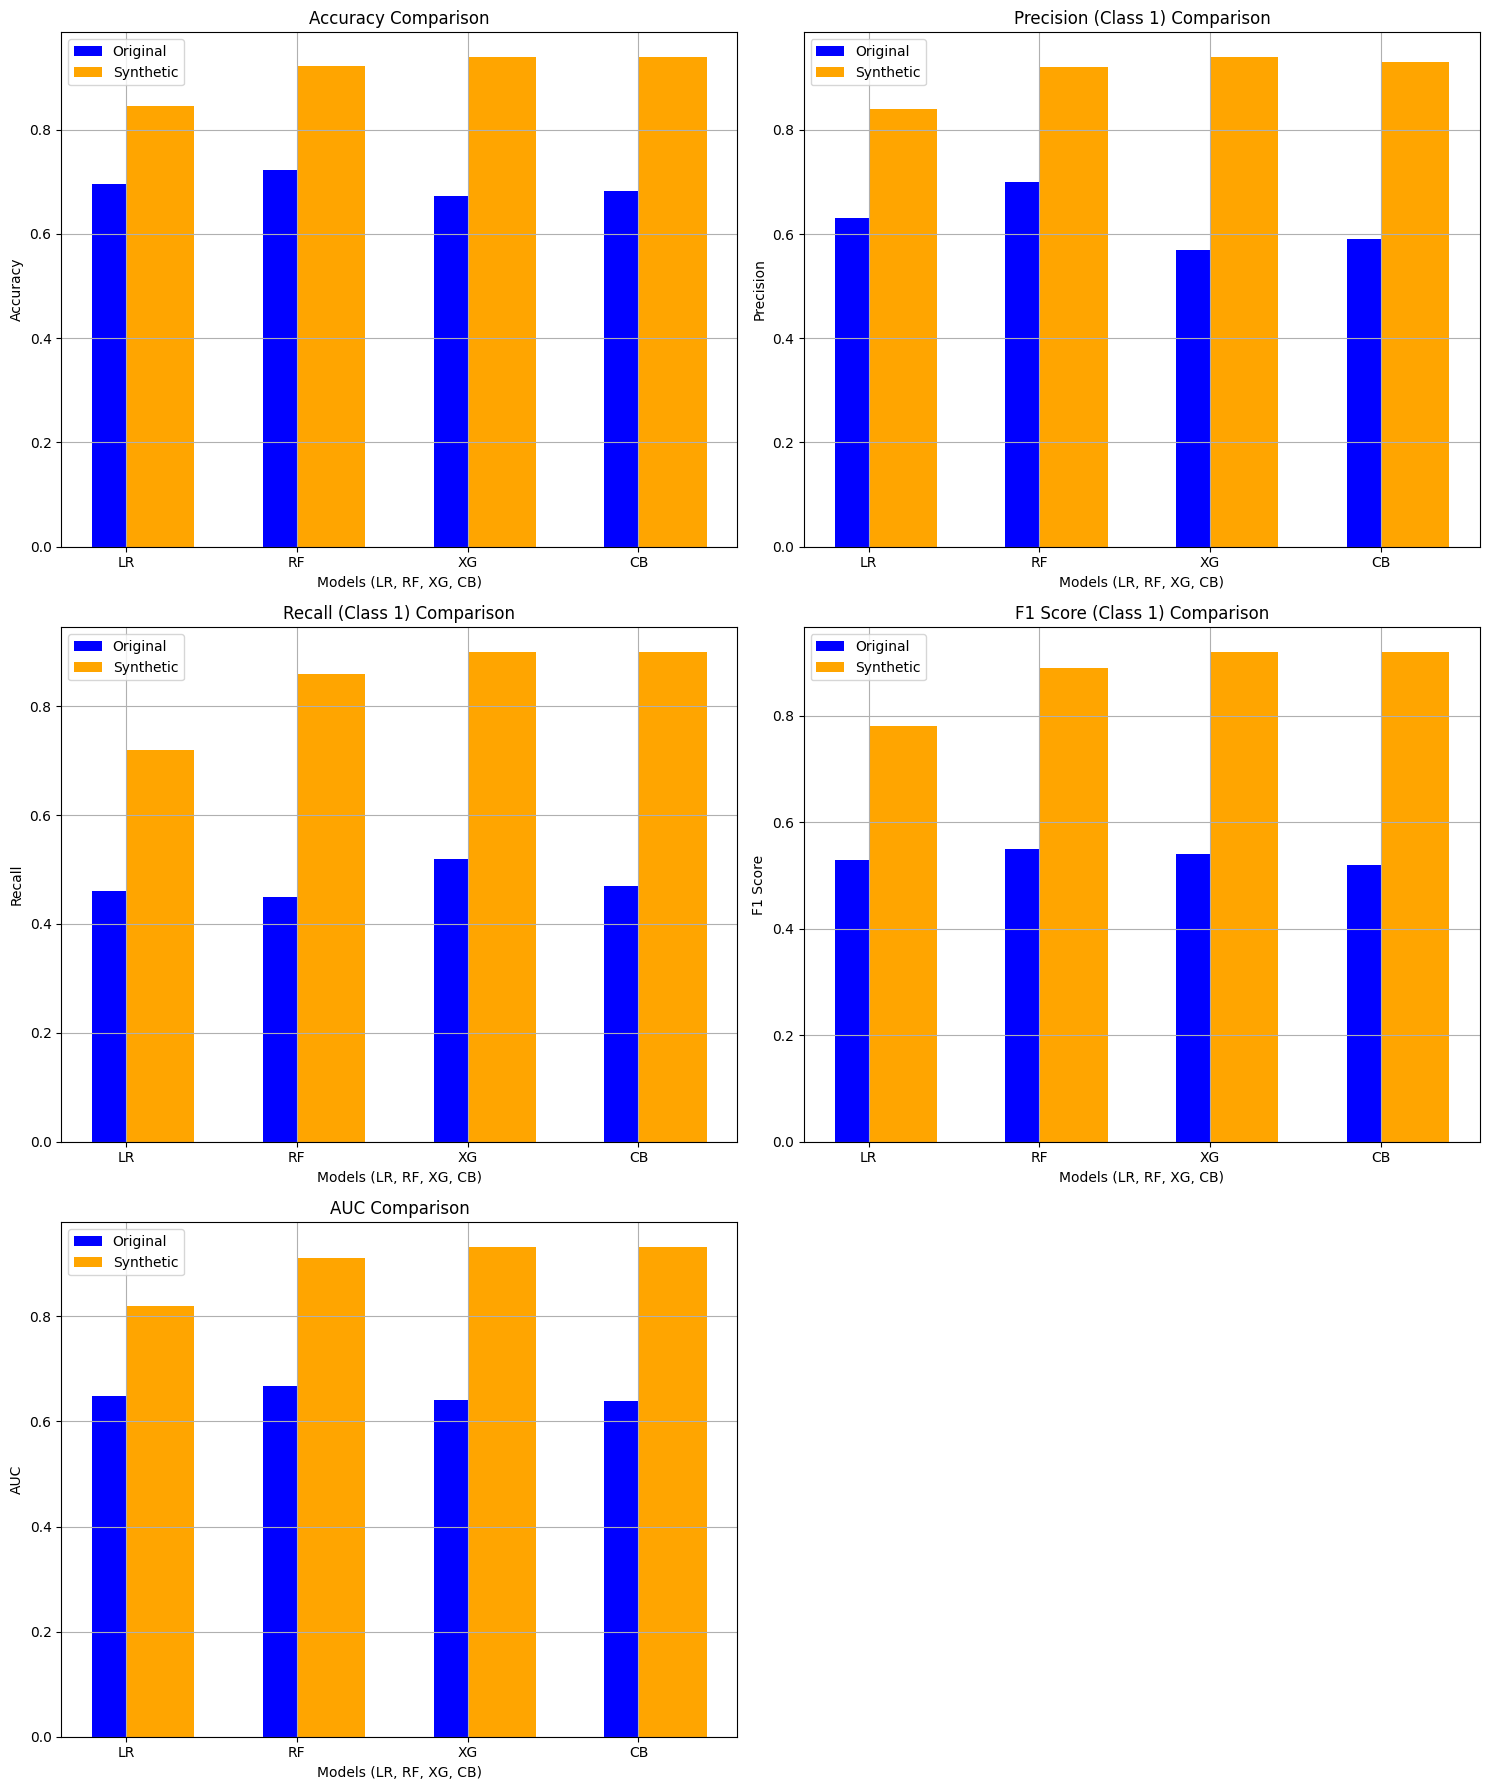

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['LR', 'RF', 'XG', 'CB']

# Accuracy values
accuracy = [0.6967418546365914, 0.7230576441102757, 0.6729, 0.6817]
synthetic_accuracy = [0.8446115288220551, 0.9223057644110275, 0.9398, 0.9398]

# Precision for class 1
precision_1 = [0.63, 0.70, 0.57, 0.59]
synthetic_precision_1 = [0.84, 0.92, 0.94, 0.93]

# Recall for class 1
recall_1 = [0.46, 0.45, 0.52, 0.47]
synthetic_recall_1 = [0.72, 0.86, 0.90, 0.90]

# F1 Score for class 1
f1_score_1 = [0.53, 0.55, 0.54, 0.52]
synthetic_f1_score_1 = [0.78, 0.89, 0.92, 0.92]

# AUC values
auc = [0.6481879194630873, 0.6678322147651008, 0.6413892617449665, 0.6388993288590604]
synthetic_auc = [0.8204161073825503, 0.9102080536912751, 0.9317, 0.9323422818791944]

# Create the subplots for each metric
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot Accuracy
axes[0, 0].bar(categories, accuracy, width=0.4, label='Original', align='center', color='blue')
axes[0, 0].bar(categories, synthetic_accuracy, width=0.4, label='Synthetic', align='edge', color='orange')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xlabel('Models (LR, RF, XG, CB)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Precision (Class 1)
axes[0, 1].bar(categories, precision_1, width=0.4, label='Original', align='center', color='blue')
axes[0, 1].bar(categories, synthetic_precision_1, width=0.4, label='Synthetic', align='edge', color='orange')
axes[0, 1].set_title('Precision (Class 1) Comparison')
axes[0, 1].set_xlabel('Models (LR, RF, XG, CB)')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Recall (Class 1)
axes[1, 0].bar(categories, recall_1, width=0.4, label='Original', align='center', color='blue')
axes[1, 0].bar(categories, synthetic_recall_1, width=0.4, label='Synthetic', align='edge', color='orange')
axes[1, 0].set_title('Recall (Class 1) Comparison')
axes[1, 0].set_xlabel('Models (LR, RF, XG, CB)')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot F1 Score (Class 1)
axes[1, 1].bar(categories, f1_score_1, width=0.4, label='Original', align='center', color='blue')
axes[1, 1].bar(categories, synthetic_f1_score_1, width=0.4, label='Synthetic', align='edge', color='orange')
axes[1, 1].set_title('F1 Score (Class 1) Comparison')
axes[1, 1].set_xlabel('Models (LR, RF, XG, CB)')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot AUC
axes[2, 0].bar(categories, auc, width=0.4, label='Original', align='center', color='blue')
axes[2, 0].bar(categories, synthetic_auc, width=0.4, label='Synthetic', align='edge', color='orange')
axes[2, 0].set_title('AUC Comparison')
axes[2, 0].set_xlabel('Models (LR, RF, XG, CB)')
axes[2, 0].set_ylabel('AUC')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Remove the empty subplot at position (2, 1)
axes[2, 1].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Synthetic vs real results table

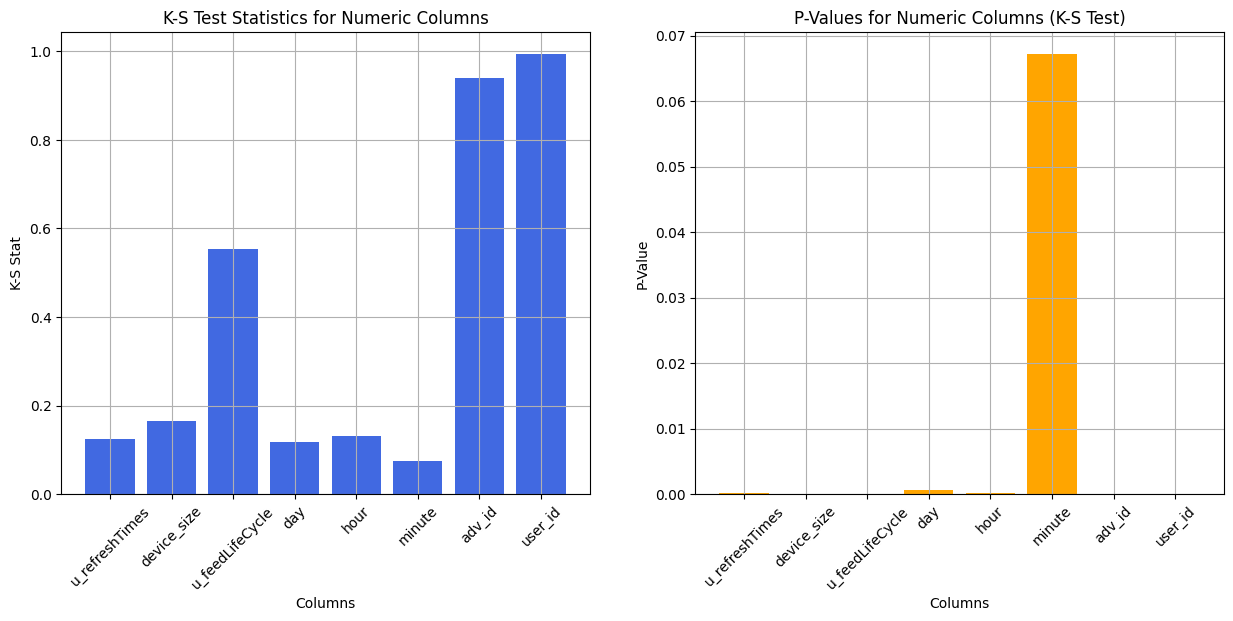

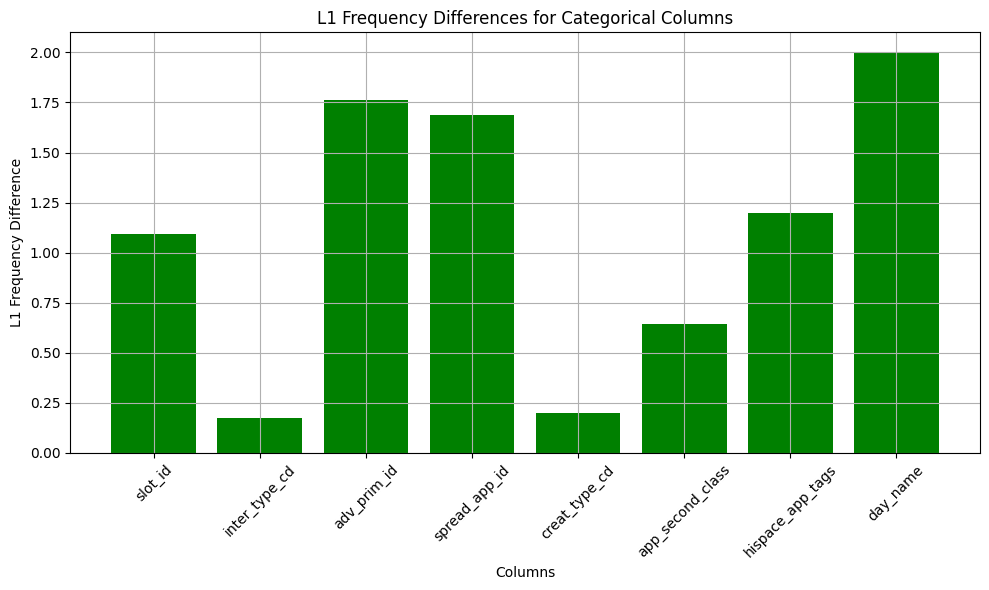

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Numeric Distribution (K-S Test)
numeric_columns = ['u_refreshTimes', 'device_size', 'u_feedLifeCycle', 'day', 'hour', 'minute', 'adv_id', 'user_id']
ks_stats = [0.1238, 0.1650, 0.5540, 0.1171, 0.1319, 0.0758, 0.9395, 0.9937]
p_values = [0.0002, 0.0000, 0.0000, 0.0006, 0.0001, 0.0672, 0.0000, 0.0000]

# Data for Categorical Distribution (L1 Frequency Difference)
categorical_columns = ['slot_id', 'inter_type_cd', 'adv_prim_id', 'spread_app_id', 'creat_type_cd', 'app_second_class', 'hispace_app_tags', 'day_name']
l1_differences = [1.0917, 0.1721, 1.7631, 1.6853, 0.2013, 0.6430, 1.1964, 2.0000]

# Create subplots for both K-S and L1 Difference Charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot K-S Statistics
axes[0].bar(numeric_columns, ks_stats, color='royalblue', label='K-S Stat')
axes[0].set_title('K-S Test Statistics for Numeric Columns')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('K-S Stat')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot p-values from K-S Test
axes[1].bar(numeric_columns, p_values, color='orange', label='P-Value')
axes[1].set_title('P-Values for Numeric Columns (K-S Test)')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('P-Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Create another figure for L1 Frequency Difference for categorical columns
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(categorical_columns, l1_differences, color='green', label='L1 Difference')
ax2.set_title('L1 Frequency Differences for Categorical Columns')
ax2.set_xlabel('Columns')
ax2.set_ylabel('L1 Frequency Difference')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


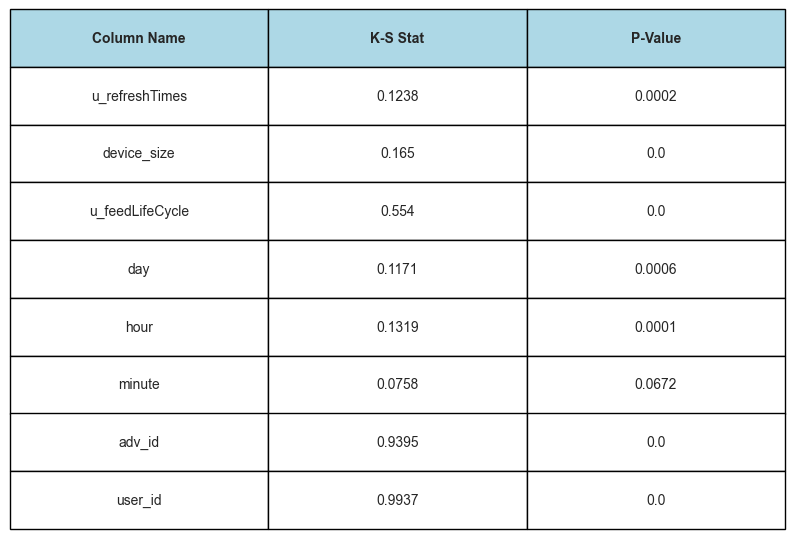

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Data for the Numeric Distribution (K-S) Results
data = {
    'Column Name': ['u_refreshTimes', 'device_size', 'u_feedLifeCycle', 'day', 'hour', 'minute', 'adv_id', 'user_id'],
    'K-S Stat': [0.1238, 0.1650, 0.5540, 0.1171, 0.1319, 0.0758, 0.9395, 0.9937],
    'P-Value': [0.0002, 0.0000, 0.0000, 0.0006, 0.0001, 0.0672, 0.0000, 0.0000]
}

# Create a DataFrame
ks_results_df = pd.DataFrame(data)

# Set up the plot size and font scaling for better spacing
plt.figure(figsize=(10, 5))  # Increase figure size for more space
sns.set(font_scale=1.4)  # Increase font scale for better readability

# Plotting the table
ax = plt.gca()
ax.axis('off')  # No axes for the table
table = ax.table(cellText=ks_results_df.values, colLabels=ks_results_df.columns, loc='center', cellLoc='center', colColours=["lightblue"]*len(ks_results_df.columns))

# Adjust cell size and padding to avoid squished appearance
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)  # Set font size for column headers
        cell.set_text_props(weight='bold')  # Make column headers bold
    else:
        cell.set_fontsize(10)  # Set font size for table cells
    cell.set_edgecolor('black')  # Add edge color for clarity
    cell.set_linewidth(1)  # Set the line width for cell borders
    cell.set_height(0.15)  # Set row height to avoid squishing

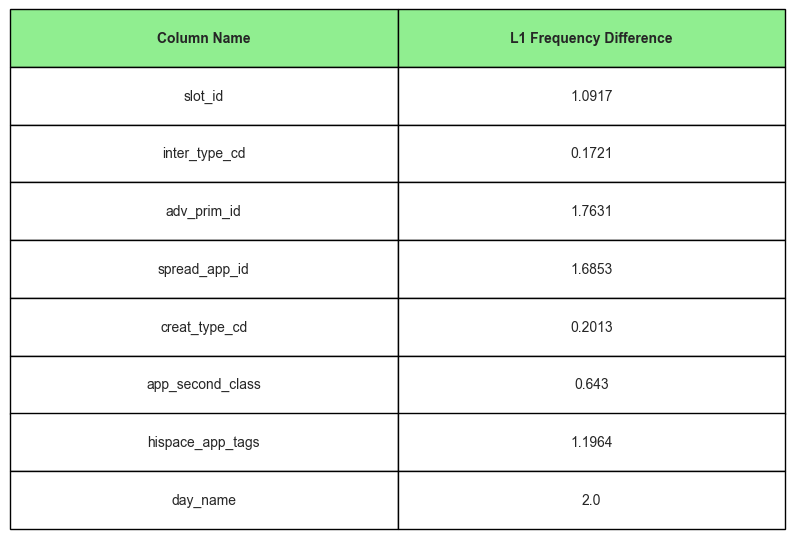

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Data for the Categorical Distribution (L1) Results
categorical_data = {
    'Column Name': ['slot_id', 'inter_type_cd', 'adv_prim_id', 'spread_app_id', 'creat_type_cd', 'app_second_class', 'hispace_app_tags', 'day_name'],
    'L1 Frequency Difference': [1.0917, 0.1721, 1.7631, 1.6853, 0.2013, 0.6430, 1.1964, 2.0000]
}

# Create a DataFrame
categorical_l1_df = pd.DataFrame(categorical_data)

# Set up the plot size and font scaling for better spacing
plt.figure(figsize=(10, 5))  # Increase figure size for more space
sns.set(font_scale=1.4)  # Increase font scale for better readability

# Plotting the table
ax = plt.gca()
ax.axis('off')  # No axes for the table
table = ax.table(cellText=categorical_l1_df.values, colLabels=categorical_l1_df.columns, loc='center', cellLoc='center', colColours=["lightgreen"]*len(categorical_l1_df.columns))

# Adjust cell size and padding to avoid squished appearance
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_fontsize(12)  # Set font size for column headers
        cell.set_text_props(weight='bold')  # Make column headers bold
    else:
        cell.set_fontsize(10)  # Set font size for table cells
    cell.set_edgecolor('black')  # Add edge color for clarity
    cell.set_linewidth(1)  # Set the line width for cell borders
    cell.set_height(0.15)  # Set row height to avoid squishing
